### Q1. titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 df를 만드세요
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')


In [ ]:
import pandas as pd 
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

In [ ]:
df.loc[:,['age','fare']]

In [ ]:
df = pd.concat([df['age'],df['fare']],axis=1)
df.head()

### Q2. 10을 더하는 함수 add_10 과 두 객체의 합 add_two_obj 함수를 정의한 후 결과값이 각각 20과 20을 출력하세요.


In [ ]:
def add_10(x):
    return x+10

def add_two_obj(a,b):
    return a+b

print(add_10(10), add_two_obj(10,10))

### Q3. 10을 곱하는 사용자 함수와 두 객체의 나눗셈을 수행하는 사용자 함수를 정의한 후 결과값이 각각 200과 10을 출력하세요.


In [ ]:
def mul_10(x):
    return x * 10

def sub_two_obj(a,b):
    return a - b

print(mul_10(20), sub_two_obj(20,10))

### Q4. df.age 에 add_10 함수를 적용해서 출력하세요.


In [ ]:
def add_10(x):
    return x + 10

df['age'] = df.age.apply(lambda x : add_10(x))
df.head()

In [ ]:
# apply() 함수는 DataFrame의 칼럼에 복잡한 연산을 vectorizing할 수 있게 해주는 함수
def add_10(x):
    return x+10

df['age'] = df.age.apply(lambda x:add_10(x)) # 열 단위 axis = 0 (생략 가능)
df.head()

### Q5. 시리즈 객체 + 숫자를 연산하는 방식으로 df.age에 10을 더한 후 sr2에 저장하고 출력하세요.


In [ ]:
sr2 = df.loc[:,'age'] + 10
sr2.head()

### Q6. 람다 함수를 활용해서 위와 같은 연산을 수행하고 결과를 sr3로 출력하세요.


In [ ]:
sr3 = df.loc[:,['age']].apply(lambda x : x+10)
sr3.head()

In [ ]:
f = lambda x : x + 10
sr3 = df.loc[:,'age'].apply(f)
sr3.head()

### Q7. df의 'age', 'fare' 칼럼에 10을 더하기 사용자 함수를 정의하고 applymap()으로 각 사용자 함수를 매핑한 후 출력하세요.


In [ ]:
def add_10(x):
    return x+10

df_map = df.applymap(add_10)
df_map.head()

### Q8. df_map의 [0,0]을 NaN으로 변경한 후 missing_value 함수를 적용해서 불린 시리즈를 반환하세요.
과제 8번에 df_map은 7번 문제에서 df_map으로 이름을 사용하신 후 진행하시면 됩니다.



In [ ]:
import numpy as np

df_map.iloc[0,0] = np.nan

def missing_value(series):
    return series.isnull()

result = df_map.apply(missing_value,axis = 0)

print(result)

### Q9. titanic 데이터셋을 seaborn에서 로딩한 후 블린 인덱싱을 이용하여 아래 사항들을 수행하세요.
- 나이가 10대(10~19세)인 승객만 따로 선택
- 나이가 10세 미만(0~9세)이고 여성인 승객만 따로 선택
- 나이가 10세 미만(0~9세) 또는 60세 이상인 승객의 age, sex, alone 열만 선택


In [ ]:
import pandas as pd 
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

In [ ]:
df.loc[(df['age']>=10) & (df['age']<20),:]

In [ ]:
# df.loc[(df['age']<10) & (df['sex']=='female'),:]

mask1 = (df['age']>=10)&(df['age']<20)
df = df.loc[mask1,:]

In [ ]:
# df.loc[(df['age']<10) | (df['age']>=60),['age','sex','alone']]

mask2 = (df['age']<10) | (df['age']>=60)
df = df.loc[mask2,:]

### Q10. 나이가 10세 미만(0~9세) 또는 60세 이상인 승객의 alone 열만 선택한 후 값을 True로 변경하세요


In [ ]:
df.loc[(df['age']<10) | (df['age']>=60),'alone']
df.loc['alone'] = True

### 그룹 연산
- 복잡한 데이터를 어떤 기준에 따라 여러 그룹으로 나누어서 관찰할 수 있으며 이런 방식으로 분할 처리하는 것을 그룹 연산 이라고 함
- 그룹 연산은 데이터를 집계, 반환, 필터하는데 효율적이며 판다스 groupby() 메소드 사용
- 그룹 객체 만들기(분할)
- 그룹 연산 메소드(적용-결합)

In [ ]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.loc[:,['age','sex','class','fare','survived']]

print('승객 수:',len(df))
print(df.head())

In [ ]:
titanic.columns

In [ ]:
# class 열을 기준으로 그룹핑(분할)
grouped = df.groupby(['class'])
print(grouped)
list(grouped)

In [ ]:
# 그룹 객체를 iteration 으로 출력
for key,group in grouped:
    print('* key :',key)
    print('* number : ',len(group))
    print(group.head())

In [ ]:
# 연산 메서드 적용
average = grouped.mean() # 생존률. 어떤 클래스가 생존률이 높은가?
print(average)

In [ ]:
stat = grouped.max()
stat

In [ ]:
# Q.3rd 그룹만을 선택해서 group3 이름으로 저장하고 통계요약표를 출력하세요.

group3 = grouped.get_group('Third')
group3.describe()

In [ ]:
grouped_two = df.groupby(['class','sex'])
average_two = grouped_two.mean()
average_two

In [ ]:
group3f = grouped_two.get_group(('Third','female'))
group3f.head()

In [ ]:
# 모든 열에 여러 함수를 매핑
agg_all = grouped.agg(['min','max'])
agg_all.head()

In [ ]:
# 각 열마다 다른 함수를 적용하여 집계
agg_sep = grouped.agg({'fare':['min','max'],'age':'mean'})
agg_sep.head()

In [ ]:
# Q. 데이터 개수가 200개 이상인 그룹만을 필터링하여 
# 데이터프레임으로 반환하여 grouped_filter 이름으로 저장 후 처음 5개 행을 출력하세요.

grouped_filter = grouped.filter(lambda x : len(x) >= 200)
grouped_filter.head()

In [ ]:
grouped_filter['class'].value_counts()

### 과제 (7/1)
Q. age열의 평균이 30보다 작은 그룹만을 필터링하여 데이터프레임으로 반환하여 age_filter 이름으로 저장 후 처음 5개 행을 출력하세요.

In [ ]:
age_filter = grouped.filter(lambda x: x['age'].mean() < 30)
age_filter.head()

## pivot 

피벗 테이블을 구성하는 4가지 요소(행 인덱스, 열 인덱스, 데이터 값, 데이터 집계함수)에 적용할 데이터프레임의 열을 각각 지정하여 함수의 인자로 전달

In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
df = titanic.loc[:,['age','sex','class','fare','survived']]
df.head()

In [ ]:
pdf1 = pd.pivot_table(df,
                     index = 'class',
                     columns = 'sex',
                     values = 'age',
                     aggfunc = 'min')
pdf1.head()

In [ ]:
pdf1 = pd.pivot_table(df,
                     index = 'class',
                     columns = 'sex',
                     values = 'fare',
                     aggfunc = 'max')
pdf1.head()

In [ ]:
pdf1 = pd.pivot_table(df,
                     index = 'class',
                     columns = 'sex',
                     values = 'survived',
                     aggfunc = 'mean')
pdf1.head()

In [ ]:
# 행, 열, 값에 사용할 열을 2개 지정 - index, values. aggfunc에 각각 2개 이상 지정
pdf2 = pd.pivot_table(df,
                     index=['class','sex'],
                     columns='survived',
                     values=['age','fare'],
                     aggfunc=['mean','max'])
pdf2

In [ ]:
# 결측값
df_t = sns.load_dataset('titanic')
df_t.isnull().sum()

In [ ]:
df_t.embarked.value_counts()

In [ ]:
# 누락데이터의 앞의 값으로 대체
df_t.embarked.fillna(method='ffill',inplace=True) # frontfill: 앞에꺼 채워줌, backfill : 뒤에꺼 채워줌
df_t.embarked.value_counts()

## 과제(7/1)
- age 컬럼의 결측치를 적절한 값으로 대체하고 그 근거를 설명하세요.
- deck컬럼의 삭제 여부를 판단하는 근거를 설명하세요.

In [ ]:
df_t.age.value_counts()

In [ ]:
# age 평균치로 넣어줌. 보통 성인 남여 생존률이 낮은 것이 근거
df_t.age.replace(np.nan, df_t.age.mean(), inplace=True)
df_t.age.value_counts()

In [ ]:
# deck컬럼의 삭제 여부를 판단하는 근거를 설명하세요.
# deck컬럼 널값 삭제해야 함. 널값이 3배 많아 정보의 의미가 없음

df_t.deck.count()

In [ ]:
df_t.deck.isnull().sum()

In [ ]:
df_t.deck.dropna(inplace=True)

In [ ]:
df_t.deck.count()

In [ ]:
결측치 처리 방법

df.dropna(subset=['column'],inplace=True) # null있는 특정 칼럼 삭제
df.dropna(inplace=True) # null있는 전체 행 삭제
fillna
df.column.replace(np.nan, df.column.mean(), inplace=True)

In [ ]:
df_t.age.

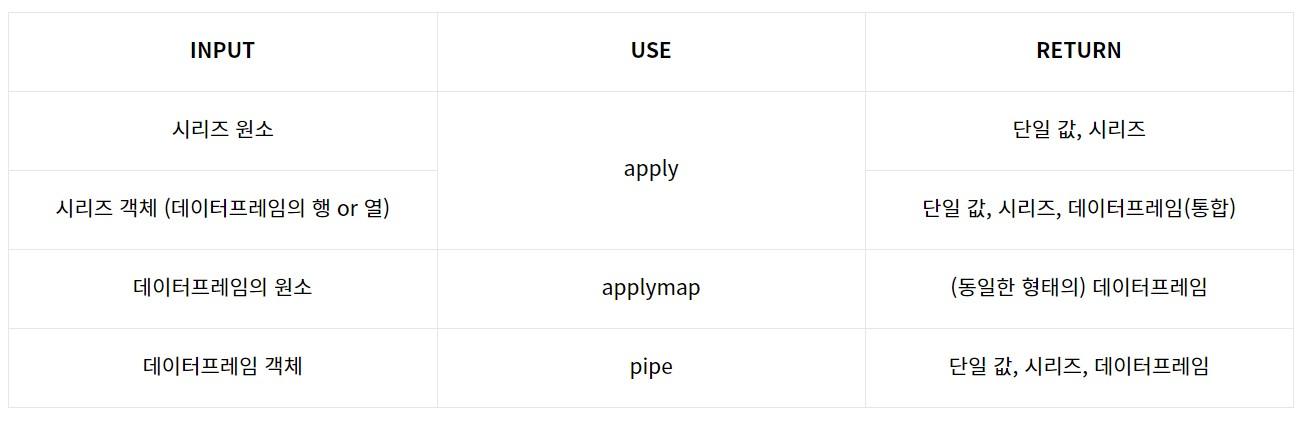
[pipe vs applymap vs apply vs map]  

pipe와 applymap과의 차이는 반환하는 결과가 pipe가 더 다양하다는 것으로 applymap은 데이터프레임 원소에 적용하므로 데이터프레임으로만 리턴되지만 pipe는 사용자 함수의 리턴값에 따라 개별 값, 시리즈, 데이터프레임을 반환할 수 있다.  

현재 가장 많이 쓰이는 메서드는 apply인데 그 이유는 다양한 형태로 값을 입력 받을 수 있고, 반환하는 형태도 폭이 넓기 때문. 결과는 같아보이지만, 시리즈를 이용해 데이터프레임의 행과 열도 이용할 수 있으며 시리즈 그 자체도 함수로 활용할 수 있다. 

만약 데이터프레임에 함수를 적용해야한다면 리턴하는 형태가 많은 pipe 사용도 고려


In [ ]:
import pandas as pd
df = pd.DataFrame({
    'col':[30,40,50,60],
    'col2':[23,35,65,45],
    'col3':[85,87,90,89]
}, index=list('ABCD'))
df

In [ ]:
df.apply(lambda x:x.sum(),axis=0)

In [ ]:
df.col.apply(lambda x:x+1) # series  - apply

In [ ]:
df.col.map(lambda x:x+1) # series  - map

In [ ]:
df.applymap(lambda x:'%.2f'%x) #dataframe - applymap

In [ ]:
# The pipe() method allows you to apply one or more functions to the DataFrame object.

import pandas as pd

def change_age(x):
  x["age"]=[10, 20, 30]
  return x

data = {
  "name": ["Sally", "Mary", "John"],
  "age": [50, 40, 30]
}

df = pd.DataFrame(data)
df


In [ ]:
df.pipe(change_age)

## 과제(7/1)
Q11~ Q15 문제를 수행하세요.

In [ ]:
# 중복
df = pd.DataFrame({'c1':['a','a','b','a','b'],
                  'c2':[1,1,1,2,2],
                  'c3':[1,1,2,2,2]})
df

In [ ]:
# 전체 행 데이터 중에서 중복 처리하는 법
df_dup = df.duplicated()
df_dup

In [ ]:
# 특정 열 데이터 중에서 중복
col_dup = df.c2.duplicated()
col_dup

In [ ]:
# drop_duplicates() : 중복 행 제거
df2 = df.drop_duplicates()
df2

In [ ]:
df3 = df.drop_duplicates(subset=['c2','c3'])
df3

In [ ]:
# 데이터 단위 변경

auto_df = pd.read_csv('dataset/auto-mpg.csv')
auto_df.head()

In [ ]:
# mpg를 kpl로 환산


mpg_to_kpl = 1.60934 / 3.78541
mpg_to_kpl

In [ ]:
auto_df['kpl'] = auto_df.mpg.apply(lambda x:x*mpg_to_kpl)
auto_df['kpl'] = auto_df.kpl.apply(lambda x:'%.2f' %x)
auto_df[['mpg','kpl']].head()

In [ ]:
auto_df.horsepower.unique()

In [ ]:
import numpy as np
auto_df.horsepower.replace('?',np.nan,inplace=True)
auto_df.dropna(subset=['horsepower'],axis=0,inplace=True)
auto_df.horsepower.isnull().sum()

In [ ]:
auto_df.horsepower.dtypes
auto_df.info()

In [ ]:
auto_df.horsepower = auto_df.horsepower.astype('float')

In [ ]:
auto_df.horsepower.dtypes

## 과제(7/1)

'?'가 있는 인덱스(불린 인덱싱)를 찾아서 포함하고 있는 행을 삭제하세요.

1) idx = DF[DF['칼럼명'] == "내용"].index

DF.drop(idx , inplace=True)


2) DF = DF[DF.칼럼명 != '특정 값']

In [ ]:
auto_df.horsepower.unique()

In [ ]:
#auto_df.horsepower.head()
mask = auto_df[auto_df['horsepower'] == '?'].index
mask

In [ ]:
auto_df.drop(mask,inplace=True)

In [ ]:
auto_df = auto_df[auto_df.horsepower != '?']

In [ ]:
auto_df.horsepower.unique()

### Q11. 최대값 - 최소값을 반환하는 사용자 함수를 min_max로 정의하고 age, fare 열로 구성되는 타이타닉 데이터프레임df 에 적용하여 결과와 자료형을 출력하세요. source : titanic = sns.load_dataset('titanic')


In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

In [ ]:
df=titanic.loc[:,['age','fare']]
#df = pd.concat([titanic['age'],titanic['fare']],axis=1)
df

In [ ]:
def min_max(x):
    return x.max() - x.min()

df1 = df.apply(min_max)
print(df1,type(df1))

### Q12. df 에서 'age' 칼럼과 'fare'칼럼을 더한 가격을 리턴하는 사용자 함수를 정의한 후 df['add'] 변수를 생성하여 출력하세요.(lambda 함수 사용)


In [ ]:
def add(x):
    return x['age']+x['fare']

df['add'] = df.apply(lambda x:add(x),axis=1)
print(df,type(df))

### Q13. 'age', 'fare' 두개 칼럼으로 구성되는 titanic 데이터프레임에서 [0,1]의 값을 NaN을 변경한 후 df 이름으로 출력하세요.


In [ ]:
df = df.replace(df.iloc[0,1], np.NaN)
df

### Q14. 각 열의 NaN 찾기, 각 열의 NaN 개수 반환, 데이터프레임의 총 NaN 개수를 반환하는 사용자 함수를 정의한 후 df.pipe 메소드로 함수 매핑한 결과를 모두 출력하세요.


In [ ]:
def nan_info(x):
    list_nan_idx = []
    list_nan_count = []
    
    for col in x.columns:
        x_na = x[col].isna()
        idx = x_na[x_na].index
        list_nan_idx.append(idx)
        
        list_nan_count.append(x[col].isna().sum())
    
    nan_all = x.isnull().sum().sum()
        
    return list_nan_idx, list_nan_count, nan_all
df.pipe(nan_info)

### Q15. 타이타닉 df의 열 순서를 아래와 같이 재구성하고 출력하세요
* 열 선택 : ['pclass', 'sex', 'age', 'survived'].
* 열 이름의 리스트 만들기
* 열 이름을 알파벳 순으로 정렬하기
* 열 이름을 기존 순서의 정반대 역순으로 정렬하기
* 열 이름을 사용자가 정의한 임의의 순서로 재배치하기


In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

In [ ]:
# 열 선택 : ['pclass', 'sex', 'age', 'survived'].
df = titanic.loc[:,['pclass', 'sex', 'age', 'survived']]
df

In [ ]:
# 열 이름의 리스트 만들기
df_list = df.columns.to_list()
df_list

In [ ]:
# 열 이름을 알파벳 순으로 정렬하기

In [ ]:
df_list.sort()
df_list

In [ ]:
# 열 이름을 기존 순서의 정반대 역순으로 정렬하기

In [ ]:
df_list.sort(reverse=True)
df_list

In [ ]:
# 열 이름을 사용자가 정의한 임의의 순서로 재배치하기

In [ ]:
order_dict = {'survived':3, 'age':2, 'pclass':1, 'sex':0}
df_list.sort(key=lambda x:order_dict[x])
df_list

# 07/04

In [ ]:
import pandas as pd
auto_df = pd.read_csv('dataset/auto-mpg.csv')
auto_df.head()

In [ ]:
auto_df.origin.unique()

Q. 아래 사항을 처리 하세요.
* origin 열의 고유값을 출력하세요.
* 정수형 데이터를 문자형 데이터로 변환한 후 고유값을 출력하세요.(1:'USA', 2:'EU', 3:'JAPAN')


In [ ]:
auto_df.origin.replace({1:'USA', 2:'EU', 3:'JAPAN'},inplace = True)

In [ ]:
auto_df.origin.unique()

In [ ]:
auto_df.origin = auto_df.origin.astype('category')
auto_df.origin.dtypes

In [ ]:
auto_df.origin = auto_df.origin.astype('str')
auto_df.origin.dtypes

In [ ]:
auto_df=pd.read_pickle('dataset/auto-mpg.pkl')
auto_df.info()

### 범주화, 도메인 지식 필요

In [ ]:
# horsepower를 3개의 bin으로 나누고 bin_names = ['저출력','보통출력','고출력']으로 출력하세요.
import numpy as np

count, bin_dividers = np.histogram(auto_df.horsepower, bins=3)

bin_names = ['저출력','보통출력','고출력']
auto_df['hp_bin'] = pd.cut(x = auto_df.horsepower, # 데이터 배열
                          bins = bin_dividers, # 경계값 리스트
                          labels = bin_names, # bin 이름
                          include_lowest=True) # 첫 경계값 포함

auto_df[['horsepower','hp_bin']].head()

### Q. horsepower 열의 최대값의 절대값으로 모든 데이터를 나누는 정규화를 수행한 후 통계요약표를 출력하세요.


In [ ]:
auto_df.horsepower = auto_df.horsepower / abs(max(auto_df.horsepower))
auto_df.describe()



In [40]:
fifa = pd.read_csv('dataset/FIFA.csv',encoding='cp949')
fifa.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355


## 과제(7/4) 
- Q. height의 값을 cm로 변환하여 새로운 컬럼 'height_cm'을 생성하세요.


In [41]:
# 1피트 = 30.48cm
# 1인치 = 2.54
cm = fifa['Height'].str.split('\'', expand=True)

cm.fillna(0, inplace=True)

cm[[0, 1]] = cm[[0, 1]].astype(int)

cm['inches'] = cm[0] * 12 + cm[1]
cm['cm'] = cm['inches'] * 2.54
fifa['height_cm'] = cm['cm']
fifa.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage,height_cm
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565,170.18
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405,187.96
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290,175.26
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260,193.04
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355,180.34


# concat, merge, join

### 데이터프레임 결합
* 판다스 join() 메소드는 merge() 함수를 기반으로 만들어졌기 때문에 기본 작동 방식이 서로 비슷
* join() 메소드는 두 데이터프레임의 행 인덱스를 기준으로 결합하는 점에서 merge와 차이가 있으나 on=keys 옵션 설정하면 열을 기준으로 결합


In [42]:
data1 = np.arange(1,21).reshape(4,5)
data2 = np.arange(11,31).reshape(5,4)
df1 = pd.DataFrame(data1,columns=list('abcde'))
df2 = pd.DataFrame(data2,columns=list('dehi'))
print(df1,'\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


In [43]:
df1.join(df2,lsuffix='_a',rsuffix='_b')

,a,b,c,d_a,e_a,d_b,e_b,h,i
0,1,2,3,4,5,11,12,13,14
1,6,7,8,9,10,15,16,17,18
2,11,12,13,14,15,19,20,21,22
3,16,17,18,19,20,23,24,25,26


In [44]:
df1.join(df2,lsuffix='_a',rsuffix='_b',how='inner')

,a,b,c,d_a,e_a,d_b,e_b,h,i
0,1,2,3,4,5,11,12,13,14
1,6,7,8,9,10,15,16,17,18
2,11,12,13,14,15,19,20,21,22
3,16,17,18,19,20,23,24,25,26


In [45]:
df1.join(df2,lsuffix='_a',rsuffix='_b',how='outer')

,a,b,c,d_a,e_a,d_b,e_b,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [46]:
df1['ind'] = [1,2,3,4]
df2['ind'] = [1,2,3,4,5]
df1

,a,b,c,d,e,ind
0,1,2,3,4,5,1
1,6,7,8,9,10,2
2,11,12,13,14,15,3
3,16,17,18,19,20,4


In [47]:
df1.set_index('ind').join(df2.set_index('ind'),lsuffix='_a',rsuffix='_b')

,a,b,c,d_a,e_a,d_b,e_b,h,i
ind,,,,,,,,,
1,1,2,3,4,5,11,12,13,14
2,6,7,8,9,10,15,16,17,18
3,11,12,13,14,15,19,20,21,22
4,16,17,18,19,20,23,24,25,26


In [48]:
df_s1 = pd.read_excel('dataset/stock price.xlsx',engine='openpyxl',index_col='id')
df_s2 = pd.read_excel('dataset/stock valuation.xlsx',engine='openpyxl',index_col='id')
print(df_s1,'\n')
print(df_s2)

       stock_name          value   price
id                                      
128940       한미약품   59385.666667  421000
130960     CJ E&M   58540.666667   98900
138250      엔에스쇼핑   14558.666667   13200
139480        이마트  239230.833333  254500
142280     녹십자엠에스     468.833333   10200
145990        삼양사   82750.000000   82000
185750        종근당   40293.666667  100500
192400      쿠쿠홀딩스  179204.666667  177500
199800         툴젠   -2514.333333  115400
204210     모두투어리츠    3093.333333    3475 

             name           eps     bps        per       pbr
id                                                          
130960     CJ E&M   6301.333333   54068  15.695091  1.829178
136480         하림    274.166667    3551  11.489362  0.887074
138040    메리츠금융지주   2122.333333   14894   6.313806  0.899691
139480        이마트  18268.166667  295780  13.931338  0.860437
145990        삼양사   5741.000000  108090  14.283226  0.758627
161390      한국타이어   5648.500000   51341   7.453306  0.820007
181710  NHN엔터테인먼트 

In [49]:
df_j1 = df_s1.join(df_s2,how='right')
df_j1

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
130960,CJ E&M,58540.666667,98900.0,CJ E&M,6301.333333,54068,15.695091,1.829178
136480,NaN,NaN,NaN,하림,274.166667,3551,11.489362,0.887074
138040,NaN,NaN,NaN,메리츠금융지주,2122.333333,14894,6.313806,0.899691
139480,이마트,239230.833333,254500.0,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,82750.000000,82000.0,삼양사,5741.000000,108090,14.283226,0.758627
161390,NaN,NaN,NaN,한국타이어,5648.500000,51341,7.453306,0.820007
181710,NaN,NaN,NaN,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
185750,종근당,40293.666667,100500.0,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,3093.333333,3475.0,모두투어리츠,85.166667,5335,40.802348,0.651359


In [50]:
df_j2 = df_s1.join(df_s2,how='inner')
df_j2

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


### 과제(7/4) :
Q. df_j2 에서 중복된 칼럼을 삭제한 후 블린 인덱싱을 이용하여 eps가 3000 보다 적거나 stock_name이 이마트인 데이터를 선택하여 
데이터프레임을 생성하고 df5 이름으로 저장 및 출력하세요.(단, '<' 와 '==' 를 반드시 사용해야 함)


In [71]:
df_j2 = df_j2.drop_duplicates()
mask = (df_j2['eps']<3000) | (df_j2['stock_name']=='이마트')
df5 = df_j2[mask]
df5

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


### 데이터프레임 병합
* merge() 함수는 sql의 join 명령과 비슷한 방식으로 어떤 기준에 의해 두 데이터프레임을 병합하는 개념
* 기준이 되는 열이나 인덱스를 키라고 부름
* 키가 되는 열이나 인덱스는 반드시 양쪽 데이터프레임에 모두 존재함


In [ ]:
data1 = np.arange(1,21).reshape(4,5)
data2 = np.arange(11,31).reshape(5,4)
df1 = pd.DataFrame(data1,columns=list('abcde'))
df2 = pd.DataFrame(data2,columns=list('dehi'))
print(df1,'\n')
print(df2)

In [ ]:
df1['ind'] = [1,2,3,4]
df2['ind'] = [1,2,3,4,5]
df1

In [ ]:
pd.merge(df1,df2,on='ind',how='outer')

In [ ]:
df1.count()

### 과제 (7/4) :

df1,df2에 대하여 다음을 수행하세요.
- on='None' 으로 교집합을 만들어 출력하세요.
- 첫번째 df stock_name, 두번째 df name 을 기준으로 합집합(left)을 만들어 출력하세요.
- 오른쪽 df를 기준으로 합친 후 출력하세요
- df1에서 가격이 50000 미만인 데이터만 출력하세요
- df2에서 per가 30 보다 크고 pbr이 0.8보다 큰 데이터를 모두 출력하세요.



In [61]:
import pandas as pd
import numpy as np
    
df1 = pd.read_excel('dataset/stock price.xlsx')
df2 = pd.read_excel('dataset/stock valuation.xlsx')

df1.head()

,id,stock_name,value,price
0,128940,한미약품,59385.666667,421000
1,130960,CJ E&M,58540.666667,98900
2,138250,엔에스쇼핑,14558.666667,13200
3,139480,이마트,239230.833333,254500
4,142280,녹십자엠에스,468.833333,10200


In [62]:
df2.head()

,id,name,eps,bps,per,pbr
0,130960,CJ E&M,6301.333333,54068,15.695091,1.829178
1,136480,하림,274.166667,3551,11.489362,0.887074
2,138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
3,139480,이마트,18268.166667,295780,13.931338,0.860437
4,145990,삼양사,5741.000000,108090,14.283226,0.758627


In [63]:
# on='None' 으로 교집합을 만들어 출력하세요
df3 = pd.merge(df1,df2)
df3

,id,stock_name,value,price,name,eps,bps,per,pbr
0,130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
1,139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
2,145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
3,185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
4,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


In [64]:
# 첫번째 df stock_name, 두번째 df name 을 기준으로 합집합(left)을 만들어 출력하세요.
df3 = pd.merge(df1,df2, how='left', left_on='stock_name', right_on='name')
df3

,id_x,stock_name,value,price,id_y,name,eps,bps,per,pbr
0,128940,한미약품,59385.666667,421000,NaN,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900,130960.0,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,엔에스쇼핑,14558.666667,13200,NaN,NaN,NaN,NaN,NaN,NaN
3,139480,이마트,239230.833333,254500,139480.0,이마트,18268.166667,295780.0,13.931338,0.860437
4,142280,녹십자엠에스,468.833333,10200,NaN,NaN,NaN,NaN,NaN,NaN
5,145990,삼양사,82750.000000,82000,145990.0,삼양사,5741.000000,108090.0,14.283226,0.758627
6,185750,종근당,40293.666667,100500,185750.0,종근당,3990.333333,40684.0,25.185866,2.470259
7,192400,쿠쿠홀딩스,179204.666667,177500,NaN,NaN,NaN,NaN,NaN,NaN
8,199800,툴젠,-2514.333333,115400,NaN,NaN,NaN,NaN,NaN,NaN
9,204210,모두투어리츠,3093.333333,3475,204210.0,모두투어리츠,85.166667,5335.0,40.802348,0.651359


In [9]:
#오른쪽 df를 기준으로 합친 후 출력하세요
df3 = pd.merge(df1,df2, how='right')
df3

,id,stock_name,value,price,name,eps,bps,per,pbr
0,130960,CJ E&M,58540.666667,98900.0,CJ E&M,6301.333333,54068,15.695091,1.829178
1,136480,NaN,NaN,NaN,하림,274.166667,3551,11.489362,0.887074
2,138040,NaN,NaN,NaN,메리츠금융지주,2122.333333,14894,6.313806,0.899691
3,139480,이마트,239230.833333,254500.0,이마트,18268.166667,295780,13.931338,0.860437
4,145990,삼양사,82750.000000,82000.0,삼양사,5741.000000,108090,14.283226,0.758627
5,161390,NaN,NaN,NaN,한국타이어,5648.500000,51341,7.453306,0.820007
6,181710,NaN,NaN,NaN,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
7,185750,종근당,40293.666667,100500.0,종근당,3990.333333,40684,25.185866,2.470259
8,204210,모두투어리츠,3093.333333,3475.0,모두투어리츠,85.166667,5335,40.802348,0.651359
9,207940,NaN,NaN,NaN,삼성바이오로직스,4644.166667,60099,89.790059,6.938551


In [72]:
# df1에서 가격이 50000 미만인 데이터만 출력하세요
df1.loc[df1['price']<50000,:]

,stock_name,value,price
id,,,
138250,엔에스쇼핑,14558.666667,13200
142280,녹십자엠에스,468.833333,10200
204210,모두투어리츠,3093.333333,3475


In [65]:
# df2에서 per가 30 보다 크고 pbr이 0.8보다 큰 데이터를 모두 출력하세요.
df2.loc[(df2['per']>30) & (df2['pbr']>0.8),:]

,id,name,eps,bps,per,pbr
6,181710,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
9,207940,삼성바이오로직스,4644.166667,60099,89.790059,6.938551


### 과제(7/4)


Q16 ~ Q20까지 수행하세요

In [13]:
# reindex
import numpy as np
import pandas as pd
import random

col1 = np.random.uniform(10,20,size=10)
col2 = np.random.uniform(10,20,size=10)
sr1 = pd.Series(col1,name='col1')
sr2 = pd.Series(col2,name='col2')
df = pd.concat([sr1,sr2],axis=1)
df = df.round({'col1':2,'col2':1})
df.head()

,col1,col2
0,19.20,19.8
1,18.21,13.2
2,14.76,19.9
3,13.87,11.5
4,10.21,14.0


In [14]:
# col2를 정수로 변환하여 출력
df1 = df.copy()
df1 = df1.col2.astype(int)
df1

0    19
1    13
2    19
3    11
4    14
5    13
6    16
7    17
8    18
9    13
Name: col2, dtype: int32

In [15]:
df2 =df.copy()
df2.iloc[:3,:] = np.nan
df2.head()

,col1,col2
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,13.87,11.5
4,10.21,14.0


In [16]:
# nan값을 0으로 채우기
df2.fillna(0,inplace=True)
df2  = df2.astype({'col1':'int','col2':'int'})
df2.head()

,col1,col2
0,0,0
1,0,0
2,0,0
3,13,11
4,10,14


In [17]:
df2['col0'] = list('abcdefghij')
df2.set_index('col0',inplace=True)
df2.head()

,col1,col2
col0,,
a,0,0
b,0,0
c,0,0
d,13,11
e,10,14


In [19]:
df2.isna().sum()

col1    0
col2    0
dtype: int64

In [20]:
df3 = df2.reindex(index=[1,2],columns=['col1','col2'])
df3

,col1,col2
col0,,
1,NaN,NaN
2,NaN,NaN


In [21]:
df4 = df2.reindex(index=[3,4],columns=['col1','col2'])
df4

,col1,col2
col0,,
3,NaN,NaN
4,NaN,NaN


In [ ]:
# Scaling : MinMaxScaler, StandardScaler

In [10]:
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
boston = load_boston()
print(boston.keys())
print(boston.feature_names)
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['target'] = boston.target
df_boston.head

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396.90   4.98    

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_boston['RM'] = scaler.fit_transform(df_boston[['RM']])
df_boston[['RM']].describe()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_boston['INDUS'] = scaler.fit_transform(df_boston[['INDUS']])
df_boston[['INDUS']].describe()


### Q16. 함수 매핑을 이용하여 age에 각각 10을 곱하고 5를 더한 후 다시 더한 결과 값이 출력되게 하세요.

In [84]:
# (a * b) + (a + c)
# 데이터 가져오기
import seaborn as sns

# titanic 데이터셋에서 

titanic = sns.load_dataset('titanic')

# print(titanic.head())

df = titanic.loc[:, ['age','fare']]
print(df.head())

    age     fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


In [85]:
def mul_add(a,b,c):
    return (a*b) + (a+c)

df['age'] = df['age'].apply(mul_add,b=10,c=5)
df.head()

,age,fare
0,247.0,7.2500
1,423.0,71.2833
2,291.0,7.9250
3,390.0,53.1000
4,390.0,8.0500


### Q17. titanic.fare 데이터를 소수 2째자리 형태로 모두 출력하세요.
- 7.2500 -> 7.25


In [16]:
df['fare'] = df['fare'].round(2)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.10,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True


### Q18. df에서 fare와 age를 선택하여 100을 곱한 후 출력하세요

In [17]:


import pandas as pd

titanic = sns.load_dataset('titanic')

df = titanic

df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
df = df.loc[:,['fare','age']]*100
df

,fare,age
0,725.00,2200.0
1,7128.33,3800.0
2,792.50,2600.0
3,5310.00,3500.0
4,805.00,3500.0
...,...,...
886,1300.00,2700.0
887,3000.00,1900.0
888,2345.00,NaN
889,3000.00,2600.0


### Q19. join() 메소드는 두 데이터프레임의 행 인덱스를 기준으로 결합한다. 2개의 주식데이터를 가져와서 join() 메소드로 아래와 같이 결합한 후 다음 사항을 수행하세요.
- df1과 df2의 교집합만 출력되도록 결합하여 df4에 저장하고 출력
- df4에서 중복된 칼럼을 삭제한 후 블린 인덱싱을 이용하여 eps가 3000 보다 적거나 stock_name이 이마트인 데이터를 선택하여 데이터프레임을 생성하고 df5 이름으로 저장 및 출력하세요.(단, '<' 와 '==' 를 반드시 사용해야 함)


In [66]:
import pandas as pd

# 주식 데이터를 가져와서 데이터프레임 만들기
df1 = pd.read_excel('./dataset/stock price.xlsx', index_col='id')
df2 = pd.read_excel('./dataset/stock valuation.xlsx', index_col='id')

# 데이터프레임 결합(join)
# df1의 행 인덱스를 기준으로 결합하는 how='left'옵션이 기본 적용
df3 = df1.join(df2)
print(df3)


       stock_name          value   price    name           eps       bps  \
id                                                                         
128940       한미약품   59385.666667  421000     NaN           NaN       NaN   
130960     CJ E&M   58540.666667   98900  CJ E&M   6301.333333   54068.0   
138250      엔에스쇼핑   14558.666667   13200     NaN           NaN       NaN   
139480        이마트  239230.833333  254500     이마트  18268.166667  295780.0   
142280     녹십자엠에스     468.833333   10200     NaN           NaN       NaN   
145990        삼양사   82750.000000   82000     삼양사   5741.000000  108090.0   
185750        종근당   40293.666667  100500     종근당   3990.333333   40684.0   
192400      쿠쿠홀딩스  179204.666667  177500     NaN           NaN       NaN   
199800         툴젠   -2514.333333  115400     NaN           NaN       NaN   
204210     모두투어리츠    3093.333333    3475  모두투어리츠     85.166667    5335.0   

              per       pbr  
id                           
128940        NaN       NaN

In [68]:
# df1과 df2의 교집합만 출력되도록 결합하여 df4에 저장하고 출력
df4 = df1.join(df2)
df4

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
128940,한미약품,59385.666667,421000,NaN,NaN,NaN,NaN,NaN
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068.0,15.695091,1.829178
138250,엔에스쇼핑,14558.666667,13200,NaN,NaN,NaN,NaN,NaN
139480,이마트,239230.833333,254500,이마트,18268.166667,295780.0,13.931338,0.860437
142280,녹십자엠에스,468.833333,10200,NaN,NaN,NaN,NaN,NaN
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090.0,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684.0,25.185866,2.470259
192400,쿠쿠홀딩스,179204.666667,177500,NaN,NaN,NaN,NaN,NaN
199800,툴젠,-2514.333333,115400,NaN,NaN,NaN,NaN,NaN


In [69]:
# df4에서 중복된 칼럼을 삭제한 후 블린 인덱싱을 이용하여 eps가 3000 보다 적거나 stock_name이 이마트인 데이터를 선택하여 데이터프레임을 생성하고 
# df5 이름으로 저장 및 출력하세요.(단, '<' 와 '==' 를 반드시 사용해야 함)

df4 = df4.drop_duplicates()
mask = (df4['eps']<3000) | (df4['stock_name'] == '이마트')
df5 = df4.loc[mask,:]
df5

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
139480,이마트,239230.833333,254500,이마트,18268.166667,295780.0,13.931338,0.860437
204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335.0,40.802348,0.651359


### Q20. 아래 df에서 중복 행을 제거한 후 df2에 저장하고 출력하세요.


In [70]:

import pandas as pd
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
print(df)


  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2


In [36]:
df2 = df.drop_duplicates()
df2

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


## (07/05) Encoding : LabelEncoder, OneHotEncoder

In [100]:
import seaborn as sns
import pandas as pd
import numpy as np

titanic = sns.load_dataset('titanic')
# 특정 컬럼의 값을 변경
titanic['sex'] = titanic.sex.replace({'male':0,'female':1})
# 열 이름 변경
titanic.rename(columns={'sex':'gender','age':'age_cat','class':'c_level'},inplace=True)
# 컬럼명을 대문자로 변경
titanic.columns = map(lambda x:str(x).upper(),titanic.columns)
# 컬럼명을 소문자로 변경
titanic.rename(columns=str.lower,inplace=True)
df = titanic[['survived','pclass','gender','c_level']]
df.head()

,survived,pclass,gender,c_level
0,0,3,0,Third
1,1,1,1,First
2,1,3,1,Third
3,1,1,1,First
4,0,3,0,Third


In [101]:
import warnings
warnings.filterwarnings('ignore')
df['gender'].replace([1,0],['female','male'],inplace=True)
df.head()

,survived,pclass,gender,c_level
0,0,3,male,Third
1,1,1,female,First
2,1,3,female,Third
3,1,1,female,First
4,0,3,male,Third


In [102]:
df1 = df.copy()

In [103]:
# 인코딩 - LabelEncoder
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
features = ['gender','c_level'] 
for f in features:
    df1[f] = le.fit_transform(df1[f])
df.head()

,survived,pclass,gender,c_level
0,0,3,male,Third
1,1,1,female,First
2,1,3,female,Third
3,1,1,female,First
4,0,3,male,Third


In [104]:
df1.c_level.value_counts()

2    491
0    216
1    184
Name: c_level, dtype: int64

In [105]:
df2 = df.copy()
df3 = df2[['gender','c_level']]
pd.get_dummies(df3).head()

,gender_female,gender_male,c_level_First,c_level_Second,c_level_Third
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,1,0,0
4,0,1,0,0,1


### 과제(7/5)

- titanic 데이터셋에서 embarked, who, adult_male에 대하여 LabelEncoding 하세요.
- titanic 데이터셋에서 embarked, who, adult_male에 대하여 OneHotEncoding 하세요.


In [110]:
df = sns.load_dataset('titanic')

In [111]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [112]:
df1 = df.copy()

In [113]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
features = ['embarked','who','adult_male'] 
for f in features:
    df1[f] = le.fit_transform(df1[f])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [114]:
df2 = df1.copy()

In [115]:
df3 = df2[['embarked','who','adult_male']]
pd.get_dummies(df3).head()

,embarked,who,adult_male
0,2,1,1
1,0,2,0
2,2,2,0
3,2,2,0
4,2,1,1
